# Multiclass Classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Set up Scikit-Learn

Import scikit-learn into your program to get started:

In [ ]:
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
print("Scikit-Learn version:", sklearn.__version__)

Scikit-Learn version: 1.2.2


## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

# [Exercise 1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py)

In this exercise, we will use [Scikit-Learn](https://scikit-learn.org/stable/index.html) to:

1. Build a Multiclass logistic regression model that classifies images.
2. Train this model.
3. Evaluate the accuracy of the model.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to mean 0 standard deviation 1 with `StandardScaler`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5000, 784), (10000, 784), (5000,), (10000,))

In [ ]:
np.allclose( X_train.mean(axis=0) , 0 )

True

## Build a machine learning model

**Step 1.** Build a `sklearn.linear_model.LogisticRegression` model:

In [ ]:
clf = LogisticRegression(C=50.0 / train_samples,
                         penalty="l1",
                         solver="saga",
                         tol=0.1,
                         multi_class="multinomial")
clf

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

## Train and evaluate your model

**Step 2.** Use the `Model.fit` method with the `X_train` and `y_train` datasets to adjust your model parameters and minimize the loss:

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

**Step 3.** Use the `clf.score` method to check the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
clf.score(X_test,  y_test)

0.8247

The image classifier is now trained to ~83% accuracy on this dataset.

If you want your model to return the probability of each class, use `clf.predict_proba`:

In [ ]:
clf.predict_proba(X_test[:5])

array([[0.03018894, 0.05219263, 0.04816248, 0.03051084, 0.03814555,
        0.02738725, 0.01862427, 0.57487511, 0.03574105, 0.14417189],
       [0.18211113, 0.01067904, 0.01441674, 0.01904831, 0.09835845,
        0.0502899 , 0.01570802, 0.38553444, 0.01163926, 0.21221471],
       [0.77779133, 0.02956179, 0.07997973, 0.01983239, 0.02081631,
        0.02279173, 0.01532649, 0.01890296, 0.01089384, 0.00410342],
       [0.02353069, 0.01519682, 0.07194757, 0.01536922, 0.12280237,
        0.04063325, 0.61538737, 0.03540806, 0.02106531, 0.03865934],
       [0.01798347, 0.11029966, 0.04823679, 0.3462064 , 0.06357808,
        0.0797363 , 0.0391649 , 0.10614229, 0.07320434, 0.11544777]])

If you want your model to return the predicted class label, use `clf.predict`:

In [ ]:
clf.predict(X_test[:5])

array(['7', '7', '0', '6', '3'], dtype=object)

In [ ]:
y_test[:5]

array(['7', '7', '0', '6', '3'], dtype=object)

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Scikit-Learn](https://scikit-learn.org/stable/index.html) API.

For more examples of using Scikit-Learn, check out the [examples](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

# [Exercise 2](https://www.tensorflow.org/tutorials/quickstart/beginner)

In this exercise, we will use [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.



## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Build a machine learning model

**Step 1.** Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.build()

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                50240     
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(X_train[:1]).numpy()
predictions

array([[ 0.33332238,  0.29744035,  0.0121025 ,  0.9405262 , -0.07400599,
         0.9864349 ,  0.6162396 ,  0.01289359, -0.3562678 , -0.43728983]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.09872065, 0.09524116, 0.07159852, 0.18118127, 0.06569126,
        0.18969296, 0.13100185, 0.07165518, 0.04953622, 0.04568098]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

1.6623485

**Step 2.** Configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

**Setting aside a validation set**

In [ ]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Train and evaluate your model

**Step 3.** Use the `Model.fit` method with the `partial_X_train` and `partial_y_train` datasets, set the `epochs` parameter equal to `10`, and set the `batch_size` parameter equal to `512` to adjust your model parameters and minimize the loss; and set the `validation_data` parameter to `(X_val, y_val)` for validation:

In [ ]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/10
98/98 [==============================] - 2s 9ms/step - loss: 0.7932 - accuracy: 0.7826 - val_loss: 0.3249 - val_accuracy: 0.9113
Epoch 2/10
98/98 [==============================] - 1s 8ms/step - loss: 0.2789 - accuracy: 0.9216 - val_loss: 0.2365 - val_accuracy: 0.9350
Epoch 3/10
98/98 [==============================] - 1s 8ms/step - loss: 0.2141 - accuracy: 0.9385 - val_loss: 0.2042 - val_accuracy: 0.9422
Epoch 4/10
98/98 [==============================] - 1s 8ms/step - loss: 0.1808 - accuracy: 0.9476 - val_loss: 0.1815 - val_accuracy: 0.9473
Epoch 5/10
98/98 [==============================] - 1s 8ms/step - loss: 0.1573 - accuracy: 0.9549 - val_loss: 0.1640 - val_accuracy: 0.9523
Epoch 6/10
98/98 [==============================] - 1s 8ms/step - loss: 0.1410 - accuracy: 0.9590 - val_loss: 0.1532 - val_accuracy: 0.9549
Epoch 7/10
98/98 [==============================] - 1s 8ms/step - loss: 0.1265 - accuracy: 0.9634 - val_loss: 0.1493 - val_accuracy: 0.9561
Epoch 8/10
98/98 [==

**Plotting the training and validation loss**

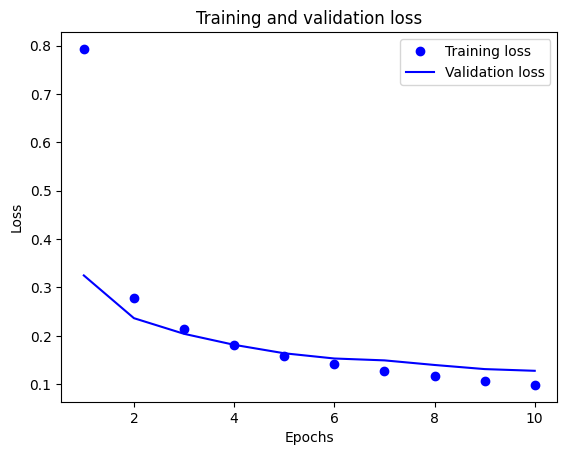

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

**Plotting the training and validation accuracy**

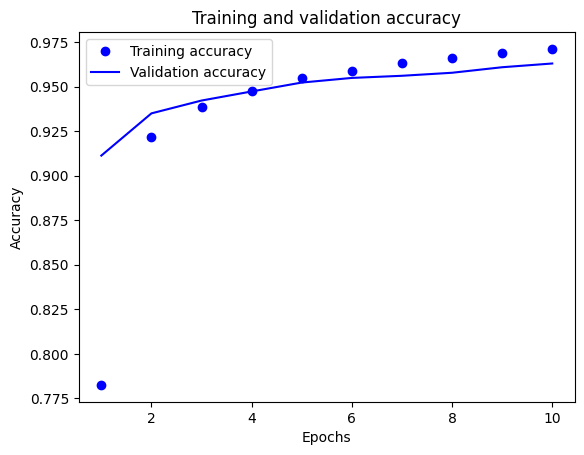

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

**Step 4.** Use the `Model.evaluate` method to check the model's performance, on the [test sets](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1219 - accuracy: 0.9631 - 502ms/epoch - 2ms/step


[0.12192070484161377, 0.963100016117096]

The image classifier is now trained to ~97% accuracy on this dataset.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.32144418e-06, 1.53170333e-06, 3.11954471e-04, 3.27927846e-04,
        1.00158793e-07, 6.19425373e-06, 7.52860529e-09, 9.99290228e-01,
        5.10537393e-05, 7.60054127e-06],
       [1.92533407e-05, 3.42056621e-04, 9.98108983e-01, 1.26522093e-03,
        5.39753131e-10, 3.48694157e-05, 1.38420350e-04, 5.12656641e-07,
        9.06413406e-05, 1.93052605e-11],
       [6.66461710e-05, 9.84053135e-01, 3.44321621e-03, 1.62231398e-03,
        2.94164143e-04, 3.20952531e-04, 1.73479645e-03, 7.28072599e-03,
        1.06860127e-03, 1.15541698e-04],
       [9.99801815e-01, 1.96455598e-08, 1.45368285e-05, 1.97747136e-06,
        1.76211955e-07, 1.29455293e-04, 3.69118243e-05, 1.07424657e-05,
        1.36082758e-06, 3.07652658e-06],
       [9.48078450e-05, 3.84602527e-06, 3.17965489e-04, 4.83947406e-06,
        9.84099507e-01, 7.17752664e-06, 2.74972612e-04, 3.20260599e-03,
        2.67892960e-04, 1.17264045e-02]], dtype=float32)>

In [ ]:
tf.round( probability_model(X_test[:5]) )

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.argmax( probability_model(X_test[:5]) , axis=1)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([7, 2, 1, 0, 4])>

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/).